In [2]:
from collections import defaultdict

import matplotlib.pyplot as pyplot
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy.cluster import hierarchy

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


Bad key "text.kerning_factor" on line 4 in
/scratch/ss2686/envs/my-rdkit-env/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import matthews_corrcoef
from scipy.io import arff
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [4]:
cp = pd.read_csv("../../CenterMeanOVLP.csv") 
cp = cp.loc[:,cp.apply(pd.Series.nunique) != 1]
cp


,Unnamed: 0,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0,smiles_r
0,0,-53.322266,15.138672,-7.832031,0.020546,0.011831,-0.005042,0.006361,1.567715,1.506277,...,0.007785,0.019312,0.020843,-0.064662,-0.072990,-0.084042,0.215716,0.155296,0.176099,Brc1c(NC2=NCCN2)ccc2nccnc12
1,1,41.678711,1.973633,-8.867188,0.008705,0.008857,-0.001514,-0.009787,0.946463,1.437743,...,-0.018887,-0.003844,-0.019000,0.007360,0.025757,0.027188,0.088701,0.052283,0.062916,c1ccc(C(O[C@@H]2CCCN(CCc3ccc4c(c3)OCO4)C2)c2cc...
2,2,418.492188,6.976562,7.766602,0.023997,0.005404,-0.005869,-0.024194,6.252890,6.685650,...,-0.105881,0.011543,0.004370,-0.208441,-0.081369,-0.084740,-0.095445,-0.015152,-0.045636,c1cnc(N2CCN(Cc3ccc4c(c3)OCO4)CC2)nc1
3,3,-10.445312,0.101562,-0.045898,-0.003597,0.000294,0.002599,-0.001359,-0.473211,-0.001053,...,-0.024427,-0.053814,-0.040165,-0.066490,-0.036203,-0.040287,0.040549,0.026975,0.027425,c1ccc(C2CC2)c(OCC2=NCCN2)c1
4,4,48.655273,1.666992,2.486328,0.018529,0.011256,-0.002420,0.004862,1.776159,1.611745,...,0.116695,0.172022,0.164453,-0.012553,0.000800,-0.010659,0.088510,0.083851,0.076598,C(=C/c1ccccc1)\CN1CCN(C(c2ccccc2)c2ccccc2)CC1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,-133.445312,-2.585938,-4.170898,-0.006187,-0.002578,-0.001801,-0.007760,-2.365016,-2.547309,...,-0.069310,-0.098329,-0.084651,-0.048275,-0.071216,-0.062632,-0.079043,-0.088448,-0.085335,c1ccc2c(c1)[nH]c1cnccc12
642,642,-26.469727,-0.145508,-0.763672,-0.006640,-0.000166,0.001977,-0.003229,-0.770855,-0.478971,...,-0.040332,-0.035610,-0.022689,-0.003744,-0.012261,-0.003150,-0.006708,-0.009239,-0.004748,c1ccc2c(c1)cc1ccc3cccc4ccc2c1c34
643,643,215.939732,2.107143,-7.992188,0.014079,0.009538,-0.005964,0.005382,3.785917,4.371880,...,-0.084987,-0.049924,-0.072038,-0.012332,0.017893,0.006418,0.005525,0.026849,0.029421,c1ccc(-c2ccc(C(c3ccccc3)n3ccnc3)cc2)cc1
644,644,1810.023438,4.320312,-1.496094,0.085425,0.025699,-0.030275,-0.063700,27.234844,31.637251,...,0.243208,0.345452,0.292939,0.108634,0.165323,0.152386,-0.089590,-0.020275,-0.033736,c1cnc2c(c1)ccc1cccnc12


In [5]:
toxcast = pd.read_csv("../../toxcast_Overlap.csv") 
toxcast

,Unnamed: 0,ACEA_T47D_80hr_Negative,ACEA_T47D_80hr_Positive,APR_HepG2_CellCycleArrest_24h_dn,APR_HepG2_CellCycleArrest_24h_up,APR_HepG2_CellCycleArrest_72h_dn,APR_HepG2_CellLoss_24h_dn,APR_HepG2_CellLoss_72h_dn,APR_HepG2_MicrotubuleCSK_24h_dn,APR_HepG2_MicrotubuleCSK_24h_up,...,Tanguay_ZF_120hpf_PE_up,Tanguay_ZF_120hpf_PFIN_up,Tanguay_ZF_120hpf_PIG_up,Tanguay_ZF_120hpf_SNOU_up,Tanguay_ZF_120hpf_SOMI_up,Tanguay_ZF_120hpf_SWIM_up,Tanguay_ZF_120hpf_TRUN_up,Tanguay_ZF_120hpf_TR_up,Tanguay_ZF_120hpf_YSE_up,smiles_r
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NCc1ccccc1
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C=CCN1CCc2nc(N)sc2CC1
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1cc(-c2ccc(=O)[nH]n2)ccc1OC(F)F
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC1(C)CCC(C)(C)c2cc(C(=O)Nc3ccc(C(=O)O)cc3)ccc21
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COc1ccc(Cl)cc1C(=O)NCCc1ccc(S(=O)(=O)NC(=O)NC2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,641,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC(C)(C)NC(=O)[C@H]1CC[C@H]2[C@@H]3CC[C@H]4NC(...
642,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,O=C(O)c1ccc2[nH]cc(CCCCN3CC=C(c4ccccc4)CC3)c2c1
643,643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clc1cccc(SC2CCNCC2)n1
644,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CCN(CC)CCOc1ccc(Cc2ccccc2)cc1


In [6]:
tox_list_bak=[ 'TOX21_AR_BLA_Antagonist_viability', 'TOX21_ERa_BLA_Antagonist_viability', 'TOX21_ESRE_BLA_viability', 'TOX21_FXR_BLA_antagonist_viability', 'TOX21_GR_BLA_Antagonist_viability', 'TOX21_HSE_BLA_agonist_viability', 'TOX21_MMP_viability', 'TOX21_NFkB_BLA_agonist_viability', 'TOX21_p53_BLA_p1_viability', 'TOX21_p53_BLA_p2_viability', 'TOX21_p53_BLA_p3_viability', 'TOX21_p53_BLA_p4_viability', 'TOX21_p53_BLA_p5_viability', 'TOX21_PPARg_BLA_antagonist_viability', 'TOX21_VDR_BLA_Agonist_viability', 'TOX21_VDR_BLA_antagonist_viability', 'BSK_3C_SRB_down', 'BSK_4H_SRB_down', 'BSK_BE3C_SRB_down', 'BSK_CASM3C_SRB_down', 'BSK_hDFCGF_SRB_down', 'BSK_KF3CT_SRB_down', 'BSK_LPS_SRB_down', 'BSK_SAg_PBMCCytotoxicity_down', 'BSK_SAg_SRB_down', 'ACEA_T47D_80hr_Negative', 'APR_HepG2_CellLoss_24h_dn', 'APR_HepG2_CellLoss_72h_dn', 'BSK_3C_Proliferation_down', 'BSK_3C_Vis_down', 'BSK_CASM3C_Proliferation_down', 'BSK_hDFCGF_Proliferation_down', 'BSK_SAg_Proliferation_down', 'smiles_r' ]

In [7]:
tox_list=['BSK_hDFCGF_Proliferation_down',
             'APR_HepG2_CellLoss_72h_dn',
             'BSK_3C_Proliferation_down',
             'BSK_SAg_Proliferation_down',
             'BSK_3C_SRB_down',
             'BSK_3C_Vis_down',
             'APR_HepG2_CellLoss_24h_dn',
             'BSK_LPS_SRB_down',
             'BSK_CASM3C_Proliferation_down',
             'BSK_SAg_SRB_down',
             'BSK_4H_SRB_down',
             'ACEA_T47D_80hr_Negative'
         ]

In [8]:
our_data=toxcast.reindex(columns=tox_list)

In [9]:
our_data

,BSK_hDFCGF_Proliferation_down,APR_HepG2_CellLoss_72h_dn,BSK_3C_Proliferation_down,BSK_SAg_Proliferation_down,BSK_3C_SRB_down,BSK_3C_Vis_down,APR_HepG2_CellLoss_24h_dn,BSK_LPS_SRB_down,BSK_CASM3C_Proliferation_down,BSK_SAg_SRB_down,BSK_4H_SRB_down,ACEA_T47D_80hr_Negative
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.DataStructs import cDataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import rdkit.Chem.Descriptors
from rdkit import Chem
from rdkit.Chem.EState import Fingerprinter
from rdkit.Chem import Descriptors
from rdkit.Chem.rdmolops import RDKFingerprint
from rdkit.Chem.rdMolDescriptors import *
from rdkit.Chem.EState.Fingerprinter import FingerprintMol
from rdkit.Avalon.pyAvalonTools import GetAvalonFP #GetAvalonCountFP  #int vector version
from rdkit.Chem.AllChem import  GetMorganFingerprintAsBitVect, GetErGFingerprint
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import rdkit.DataStructs.cDataStructs
from rdkit.Avalon.pyAvalonTools import GetAvalonFP

def MorganFingerprint(s):
    x = Chem.MolFromSmiles(s)
    return (AllChem.GetMorganFingerprintAsBitVect(x,2,2048))



In [11]:
from sklearn.feature_selection import VarianceThreshold



In [12]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [13]:
from sklearn.feature_selection import VarianceThreshold
from numpy  import array



In [14]:
from scipy import stats
from scipy.stats import ks_2samp 
#Calculates a point biserial correlation coefficient and the associated p-value.

    


In [15]:
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import PolynomialFeatures # add polynomial features
from sklearn.linear_model import LogisticRegression
import seaborn as sns
 #Grid Search with Cross Validation RF
from sklearn import metrics


from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search

In [16]:
from sklearn import datasets, metrics, model_selection, svm
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
from matplotlib import gridspec

from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold

In [17]:
def GetExactMolWt(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.ExactMolWt (mol))
def GetCalcTPSA(s):
    mol = Chem.MolFromSmiles(s)
    return (Chem.rdMolDescriptors.CalcTPSA(mol))
def GetNumRotatableBonds(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumRotatableBonds (mol))
def GetNumHDonors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHDonors(mol))
def GetNumHAcceptors(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.NumHAcceptors(mol) )
def GetMolLogP(s):
    mol = Chem.MolFromSmiles(s)
    return (Descriptors.MolLogP(mol))

Start
1.0    56
0.0    50
Name: BSK_hDFCGF_Proliferation_down, dtype: int64


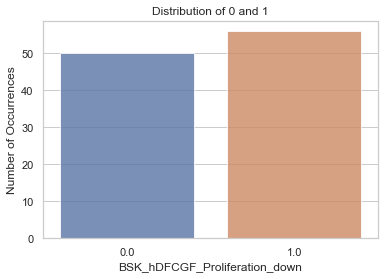

Total Compounds in Assay:  106
106
106
Total Selected CP features:  96
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   19.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   45.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.9min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[4 6]
 [4 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.40      0.44        10
         1.0       0.57      0.67      0.62        12

    accuracy                           0.55        22
   macro avg       0.54      0.53      0.53        22
weighted avg       0.54      0.55      0.54        22

Total Selected CP features:  101
Total Selected train:  85
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        10
         1.0       0.56      0.45      0.50        11

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

Total Selected CP features:  138
Total Selected train:  85
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [5 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.80      0.70        10
         1.0       0.75      0.55      0.63        11

    accuracy                           0.67        21
   macro avg       0.68      0.67      0.66        21
weighted avg       0.69      0.67      0.66        21

Total Selected CP features:  106
Total Selected train:  85
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   58.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 2]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.80      0.73        10
         1.0       0.78      0.64      0.70        11

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21

Total Selected CP features:  26
Total Selected train:  85
To

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 3]
 [3 8]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      0.70      0.70        10
         1.0       0.73      0.73      0.73        11

    accuracy                           0.71        21
   macro avg       0.71      0.71      0.71        21
weighted avg       0.71      0.71      0.71        21



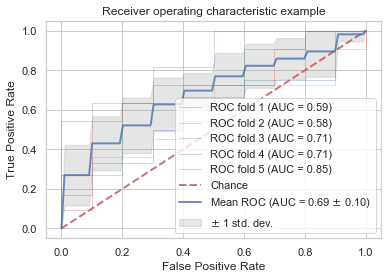

Mean of Each fold


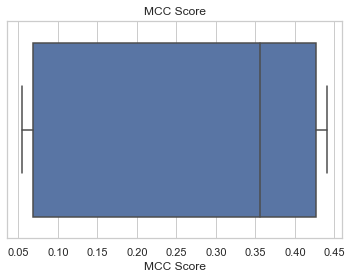

Matthews_corrcoef all:  [0.06900655593423542, 0.05504818825631803, 0.35527985620321373, 0.4403855060505442, 0.42727272727272725]
Matthews_corrcoef mean:  0.26939856674340773


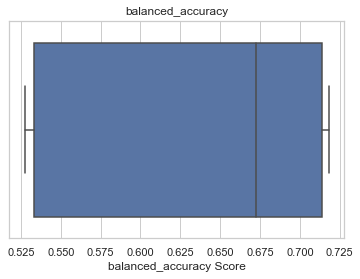

balanced_accuracy all:  [0.5333333333333333, 0.5272727272727272, 0.6727272727272727, 0.7181818181818183, 0.7136363636363636]
balanced_accuracy mean:  0.633030303030303


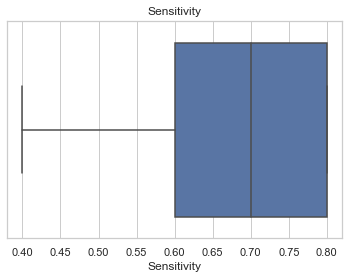

Sensitivity all:  [0.4, 0.6, 0.8, 0.8, 0.7]
Sensitivity mean:  0.6599999999999999


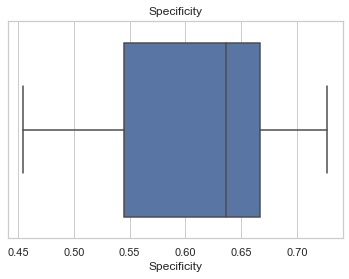

Specificity all:  [0.6666666666666666, 0.45454545454545453, 0.5454545454545454, 0.6363636363636364, 0.7272727272727273]
Specificity mean:  0.6060606060606061
One Combined Confusion Matrix
conf_matrix: 
  [[33 17]
 [22 34]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.66      0.63        50
         1.0       0.67      0.61      0.64        56

    accuracy                           0.63       106
   macro avg       0.63      0.63      0.63       106
weighted avg       0.64      0.63      0.63       106

matthews_corrcoef
0.26690465570704314
balanced_accuracy_score
0.6335714285714286
Sensitivity
0.66
Specificity
0.6071428571428571
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6635714285714285


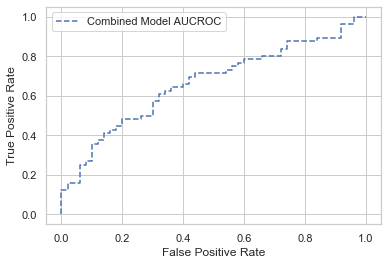

Start
1.0    45
0.0    43
Name: APR_HepG2_CellLoss_72h_dn, dtype: int64


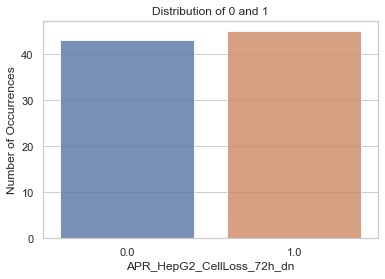

Total Compounds in Assay:  88
88
88
Total Selected CP features:  36
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [2 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84         9
         1.0       0.88      0.78      0.82         9

    accuracy                           0.83        18
   macro avg       0.84      0.83      0.83        18
weighted avg       0.84      0.83      0.83        18

Total Selected CP features:  107
Total Selected train:  70
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 1]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.89      0.80         9
         1.0       0.86      0.67      0.75         9

    accuracy                           0.78        18
   macro avg       0.79      0.78      0.77        18
weighted avg       0.79      0.78      0.77        18

Total Selected CP features:  135
Total Selected train:  70
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 0]
 [8 1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.53      1.00      0.69         9
         1.0       1.00      0.11      0.20         9

    accuracy                           0.56        18
   macro avg       0.76      0.56      0.45        18
weighted avg       0.76      0.56      0.45        18

Total Selected CP features:  69
Total Selected train:  71
To

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[5 3]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.62      0.62         8
         1.0       0.67      0.67      0.67         9

    accuracy                           0.65        17
   macro avg       0.65      0.65      0.65        17
weighted avg       0.65      0.65      0.65        17

Total Selected CP features:  102
Total Selected train:  71
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 1]
 [7 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.88      0.64         8
         1.0       0.67      0.22      0.33         9

    accuracy                           0.53        17
   macro avg       0.58      0.55      0.48        17
weighted avg       0.59      0.53      0.48        17



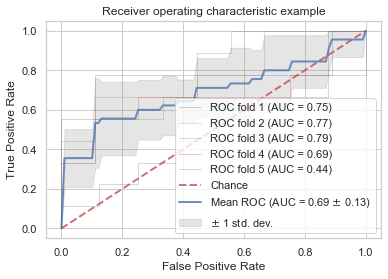

Mean of Each fold


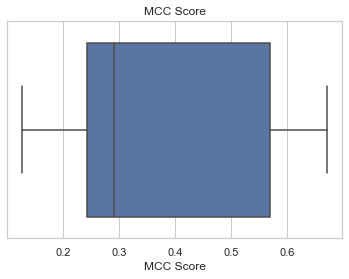

Matthews_corrcoef all:  [0.6708203932499369, 0.5698028822981898, 0.24253562503633297, 0.2916666666666667, 0.1272937693043289]
Matthews_corrcoef mean:  0.38042386731109107


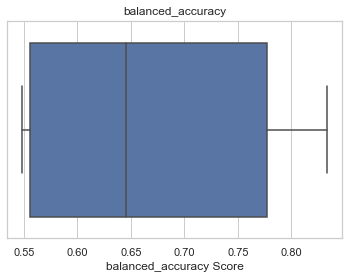

balanced_accuracy all:  [0.8333333333333333, 0.7777777777777777, 0.5555555555555556, 0.6458333333333333, 0.5486111111111112]
balanced_accuracy mean:  0.6722222222222223


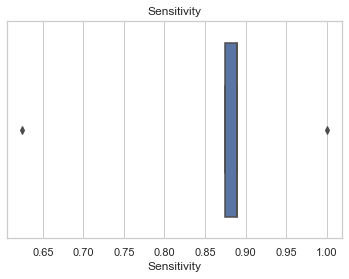

Sensitivity all:  [0.8888888888888888, 0.8888888888888888, 1.0, 0.625, 0.875]
Sensitivity mean:  0.8555555555555555


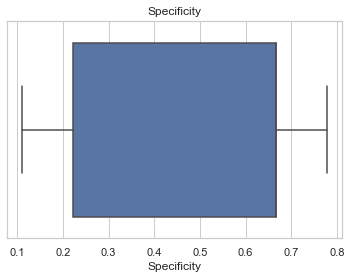

Specificity all:  [0.7777777777777778, 0.6666666666666666, 0.1111111111111111, 0.6666666666666666, 0.2222222222222222]
Specificity mean:  0.48888888888888893
One Combined Confusion Matrix
conf_matrix: 
  [[37  6]
 [23 22]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.86      0.72        43
         1.0       0.79      0.49      0.60        45

    accuracy                           0.67        88
   macro avg       0.70      0.67      0.66        88
weighted avg       0.70      0.67      0.66        88

matthews_corrcoef
0.3749311901103766
balanced_accuracy_score
0.6746770025839793
Sensitivity
0.8604651162790697
Specificity
0.4888888888888889
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6656330749354006


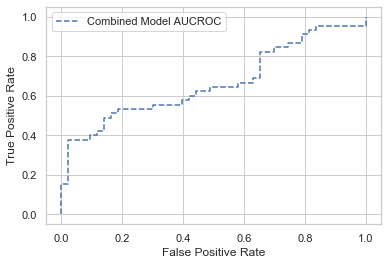

Start
1.0    54
0.0    52
Name: BSK_3C_Proliferation_down, dtype: int64


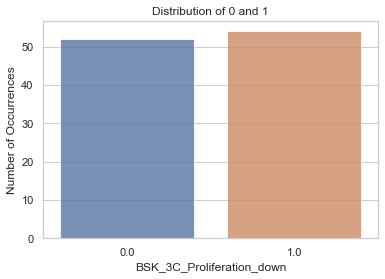

Total Compounds in Assay:  106
106
106
Total Selected CP features:  76
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.1min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.73      0.64        11
         1.0       0.62      0.45      0.53        11

    accuracy                           0.59        22
   macro avg       0.60      0.59      0.58        22
weighted avg       0.60      0.59      0.58        22

Total Selected CP features:  43
Total Selected train:  85

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 1]
 [4 7]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.90      0.78        10
         1.0       0.88      0.64      0.74        11

    accuracy                           0.76        21
   macro avg       0.78      0.77      0.76        21
weighted avg       0.79      0.76      0.76        21

Total Selected CP features:  120
Total Selected train:  85
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 4]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.60      0.55        10
         1.0       0.56      0.45      0.50        11

    accuracy                           0.52        21
   macro avg       0.53      0.53      0.52        21
weighted avg       0.53      0.52      0.52        21

Total Selected CP features:  113
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 1]
 [6 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.90      0.72        10
         1.0       0.83      0.45      0.59        11

    accuracy                           0.67        21
   macro avg       0.72      0.68      0.65        21
weighted avg       0.72      0.67      0.65        21

Total Selected CP features:  54
Total Selected train:  85
To

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 5]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.55      0.55      0.55        11
         1.0       0.50      0.50      0.50        10

    accuracy                           0.52        21
   macro avg       0.52      0.52      0.52        21
weighted avg       0.52      0.52      0.52        21



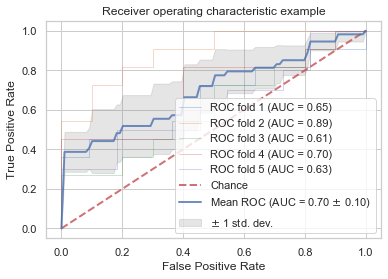

Mean of Each fold


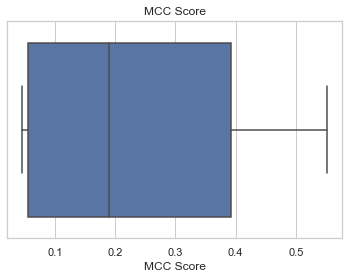

Matthews_corrcoef all:  [0.18898223650461363, 0.5516187241049897, 0.05504818825631803, 0.3919647479510927, 0.045454545454545456]
Matthews_corrcoef mean:  0.24661368845431192


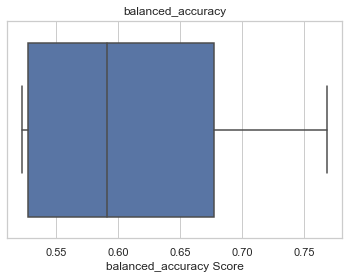

balanced_accuracy all:  [0.5909090909090909, 0.7681818181818182, 0.5272727272727272, 0.6772727272727272, 0.5227272727272727]
balanced_accuracy mean:  0.6172727272727272


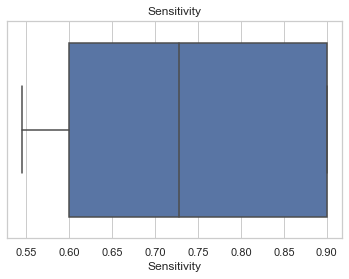

Sensitivity all:  [0.7272727272727273, 0.9, 0.6, 0.9, 0.5454545454545454]
Sensitivity mean:  0.7345454545454546


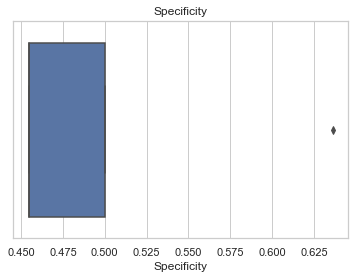

Specificity all:  [0.45454545454545453, 0.6363636363636364, 0.45454545454545453, 0.45454545454545453, 0.5]
Specificity mean:  0.5
One Combined Confusion Matrix
conf_matrix: 
  [[38 14]
 [27 27]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.58      0.73      0.65        52
         1.0       0.66      0.50      0.57        54

    accuracy                           0.61       106
   macro avg       0.62      0.62      0.61       106
weighted avg       0.62      0.61      0.61       106

matthews_corrcoef
0.2368797016896835
balanced_accuracy_score
0.6153846153846154
Sensitivity
0.7307692307692307
Specificity
0.5
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6841168091168092


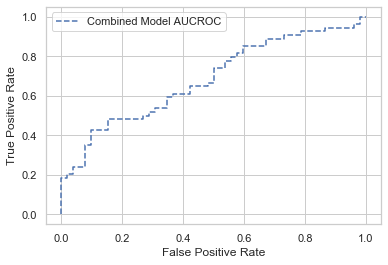

Start
0.0    58
1.0    48
Name: BSK_SAg_Proliferation_down, dtype: int64


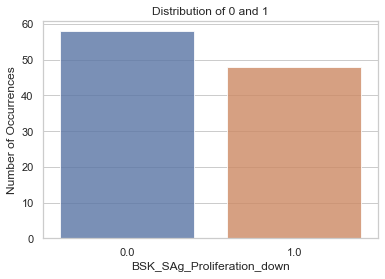

Total Compounds in Assay:  106
106
106
Total Selected CP features:  186
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  1]
 [ 7  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.61      0.92      0.73        12
         1.0       0.75      0.30      0.43        10

    accuracy                           0.64        22
   macro avg       0.68      0.61      0.58        22
weighted avg       0.67      0.64      0.59        22

Total Selected CP features:  117
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [5 5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.73      0.67        11
         1.0       0.62      0.50      0.56        10

    accuracy                           0.62        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.62      0.62      0.61        21

Total Selected CP features:  186
Total Selected train:  85
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 3]
 [6 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.73      0.64        11
         1.0       0.57      0.40      0.47        10

    accuracy                           0.57        21
   macro avg       0.57      0.56      0.56        21
weighted avg       0.57      0.57      0.56        21

Total Selected CP features:  240
Total Selected train:  85
Tot

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[6 6]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.50      0.50      0.50        12
         1.0       0.33      0.33      0.33         9

    accuracy                           0.43        21
   macro avg       0.42      0.42      0.42        21
weighted avg       0.43      0.43      0.43        21

Total Selected CP features:  105
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  2]
 [ 5  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.83      0.74        12
         1.0       0.67      0.44      0.53         9

    accuracy                           0.67        21
   macro avg       0.67      0.64      0.64        21
weighted avg       0.67      0.67      0.65        21



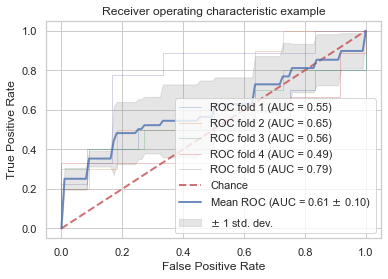

Mean of Each fold


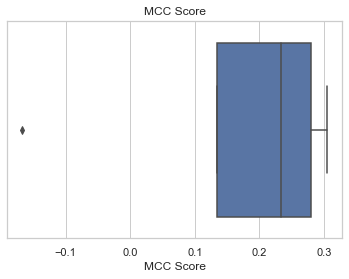

Matthews_corrcoef all:  [0.2797154638927579, 0.2337367475021143, 0.13483997249264842, -0.16666666666666666, 0.3042903097250923]
Matthews_corrcoef mean:  0.15718316538918925


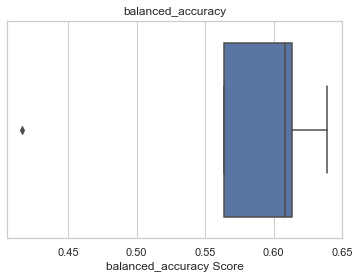

balanced_accuracy all:  [0.6083333333333333, 0.6136363636363636, 0.5636363636363637, 0.41666666666666663, 0.6388888888888888]
balanced_accuracy mean:  0.5682323232323232


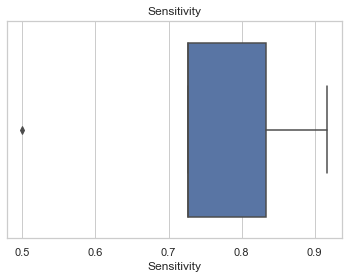

Sensitivity all:  [0.9166666666666666, 0.7272727272727273, 0.7272727272727273, 0.5, 0.8333333333333334]
Sensitivity mean:  0.740909090909091


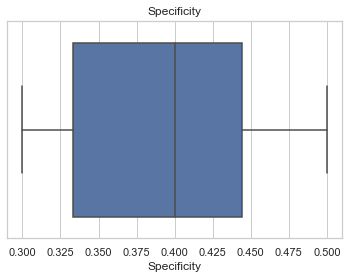

Specificity all:  [0.3, 0.5, 0.4, 0.3333333333333333, 0.4444444444444444]
Specificity mean:  0.39555555555555555
One Combined Confusion Matrix
conf_matrix: 
  [[43 15]
 [29 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.74      0.66        58
         1.0       0.56      0.40      0.46        48

    accuracy                           0.58       106
   macro avg       0.58      0.57      0.56       106
weighted avg       0.58      0.58      0.57       106

matthews_corrcoef
0.14632651884209177
balanced_accuracy_score
0.5686063218390804
Sensitivity
0.7413793103448276
Specificity
0.3958333333333333
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5944683908045977


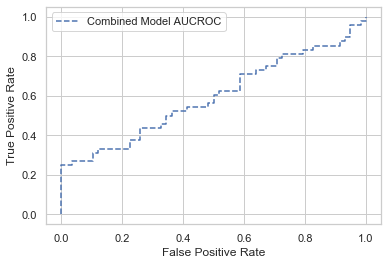

Start
0.0    61
1.0    45
Name: BSK_3C_SRB_down, dtype: int64


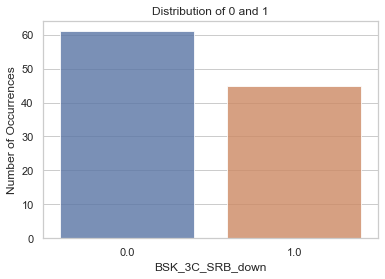

Total Compounds in Assay:  106
106
106
Total Selected CP features:  15
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 4]
 [3 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.69      0.72        13
         1.0       0.60      0.67      0.63         9

    accuracy                           0.68        22
   macro avg       0.68      0.68      0.68        22
weighted avg       0.69      0.68      0.68        22

Total Selected CP features:  70
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  2]
 [ 7  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.59      0.83      0.69        12
         1.0       0.50      0.22      0.31         9

    accuracy                           0.57        21
   macro avg       0.54      0.53      0.50        21
weighted avg       0.55      0.57      0.53        21

Total Selected CP features:  32
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  0]
 [ 7  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.63      1.00      0.77        12
         1.0       1.00      0.22      0.36         9

    accuracy                           0.67        21
   macro avg       0.82      0.61      0.57        21
weighted avg       0.79      0.67      0.60        21

Total Selected CP features:  83
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   11.2s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[8 4]
 [6 3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        12
         1.0       0.43      0.33      0.38         9

    accuracy                           0.52        21
   macro avg       0.50      0.50      0.50        21
weighted avg       0.51      0.52      0.51        21

Total Selected CP features:  30
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 3]
 [7 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.56      0.75      0.64        12
         1.0       0.40      0.22      0.29         9

    accuracy                           0.52        21
   macro avg       0.48      0.49      0.46        21
weighted avg       0.49      0.52      0.49        21



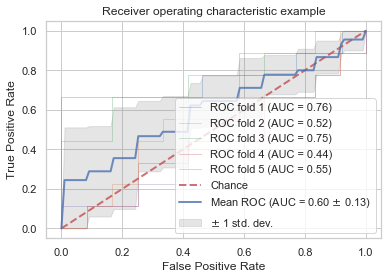

Mean of Each fold


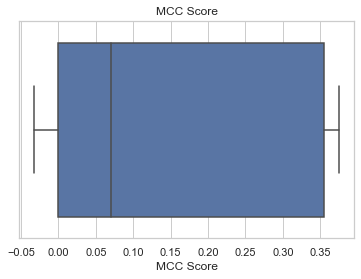

Matthews_corrcoef all:  [0.3544587784792833, 0.0700140042014005, 0.37463432463267765, 0.0, -0.032274861218395144]
Matthews_corrcoef mean:  0.15336644921899326


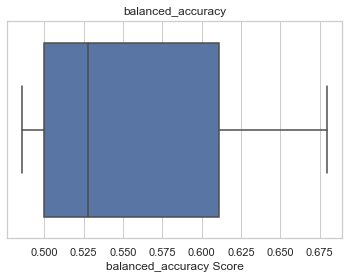

balanced_accuracy all:  [0.6794871794871795, 0.5277777777777778, 0.6111111111111112, 0.5, 0.4861111111111111]
balanced_accuracy mean:  0.5608974358974359


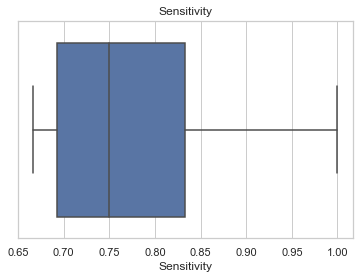

Sensitivity all:  [0.6923076923076923, 0.8333333333333334, 1.0, 0.6666666666666666, 0.75]
Sensitivity mean:  0.7884615384615384


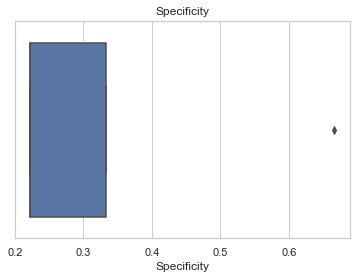

Specificity all:  [0.6666666666666666, 0.2222222222222222, 0.2222222222222222, 0.3333333333333333, 0.2222222222222222]
Specificity mean:  0.3333333333333333
One Combined Confusion Matrix
conf_matrix: 
  [[48 13]
 [30 15]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.62      0.79      0.69        61
         1.0       0.54      0.33      0.41        45

    accuracy                           0.59       106
   macro avg       0.58      0.56      0.55       106
weighted avg       0.58      0.59      0.57       106

matthews_corrcoef
0.13477720584014027
balanced_accuracy_score
0.5601092896174863
Sensitivity
0.7868852459016393
Specificity
0.3333333333333333
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.5635701275045537


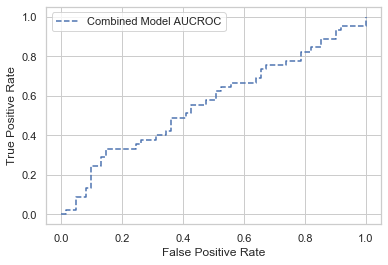

Start
0.0    65
1.0    41
Name: BSK_3C_Vis_down, dtype: int64


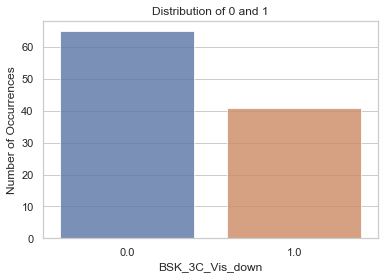

Total Compounds in Assay:  106
106
106
Total Selected CP features:  64
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 3  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.86      0.67      0.75         9

    accuracy                           0.82        22
   macro avg       0.83      0.79      0.80        22
weighted avg       0.82      0.82      0.81        22

Total Selected CP features:  267
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.3min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        13
         1.0       0.75      0.38      0.50         8

    accuracy                           0.71        21
   macro avg       0.73      0.65      0.65        21
weighted avg       0.72      0.71      0.69        21

Total Selected CP features:  80
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 3  5]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.83      0.62      0.71         8

    accuracy                           0.81        21
   macro avg       0.82      0.77      0.79        21
weighted avg       0.81      0.81      0.80        21

Total Selected CP features:  271
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 6  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.92      0.77        13
         1.0       0.67      0.25      0.36         8

    accuracy                           0.67        21
   macro avg       0.67      0.59      0.57        21
weighted avg       0.67      0.67      0.62        21

Total Selected CP features:  252
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.5s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  3]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.67      0.77      0.71        13
         1.0       0.50      0.38      0.43         8

    accuracy                           0.62        21
   macro avg       0.58      0.57      0.57        21
weighted avg       0.60      0.62      0.61        21



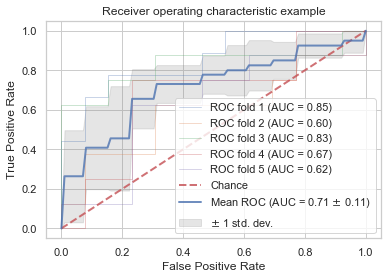

Mean of Each fold


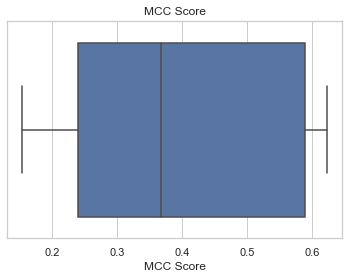

Matthews_corrcoef all:  [0.6225317562548818, 0.3686299079697329, 0.5891649892987402, 0.2401922307076307, 0.15504341823651058]
Matthews_corrcoef mean:  0.39511246049349924


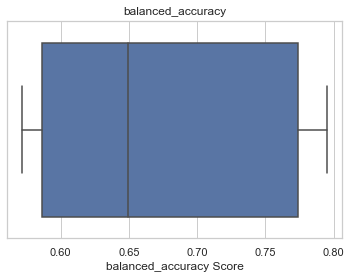

balanced_accuracy all:  [0.7948717948717949, 0.6490384615384616, 0.7740384615384616, 0.5865384615384616, 0.5721153846153846]
balanced_accuracy mean:  0.6753205128205129


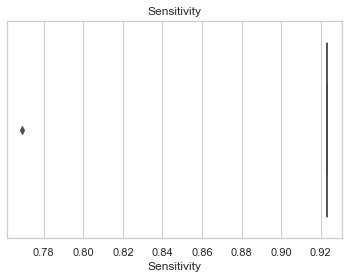

Sensitivity all:  [0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.9230769230769231, 0.7692307692307693]
Sensitivity mean:  0.8923076923076924


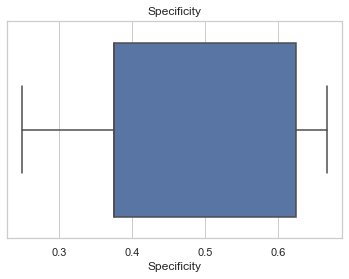

Specificity all:  [0.6666666666666666, 0.375, 0.625, 0.25, 0.375]
Specificity mean:  0.4583333333333333
One Combined Confusion Matrix
conf_matrix: 
  [[58  7]
 [22 19]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.89      0.80        65
         1.0       0.73      0.46      0.57        41

    accuracy                           0.73       106
   macro avg       0.73      0.68      0.68       106
weighted avg       0.73      0.73      0.71       106

matthews_corrcoef
0.40265033353444046
balanced_accuracy_score
0.677861163227017
Sensitivity
0.8923076923076924
Specificity
0.4634146341463415
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7046904315196998


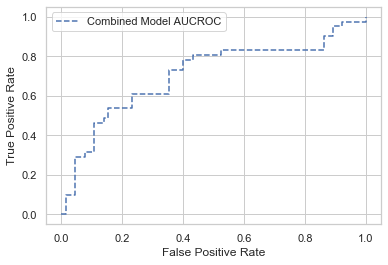

Start
0.0    55
1.0    33
Name: APR_HepG2_CellLoss_24h_dn, dtype: int64


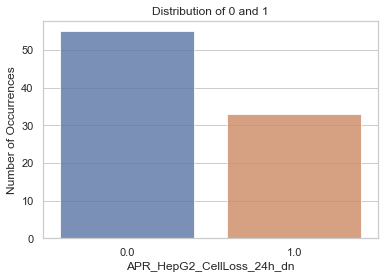

Total Compounds in Assay:  88
88
88
Total Selected CP features:  122
Total Selected train:  70
Total Selected test:  18
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      1.00      0.85        11
         1.0       1.00      0.43      0.60         7

    accuracy                           0.78        18
   macro avg       0.87      0.71      0.72        18
weighted avg       0.84      0.78      0.75        18

Total Selected CP features:  121
Total Selected train:  70

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   36.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        11
         1.0       1.00      0.57      0.73         7

    accuracy                           0.83        18
   macro avg       0.89      0.79      0.80        18
weighted avg       0.87      0.83      0.82        18

Total Selected CP features:  329
Total Selected train:  70


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   32.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        11
         1.0       1.00      0.14      0.25         7

    accuracy                           0.67        18
   macro avg       0.82      0.57      0.52        18
weighted avg       0.78      0.67      0.58        18

Total Selected CP features:  258
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  0]
 [ 5  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      1.00      0.81        11
         1.0       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17

Total Selected CP features:  181
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[7 4]
 [2 4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        11
         1.0       0.50      0.67      0.57         6

    accuracy                           0.65        17
   macro avg       0.64      0.65      0.64        17
weighted avg       0.68      0.65      0.65        17



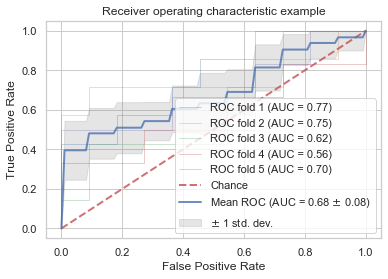

Mean of Each fold


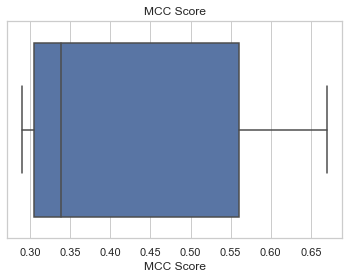

Matthews_corrcoef all:  [0.5606119105813882, 0.6700593942604899, 0.30403449605253013, 0.338501600193165, 0.29012942659282975]
Matthews_corrcoef mean:  0.4326673655360806


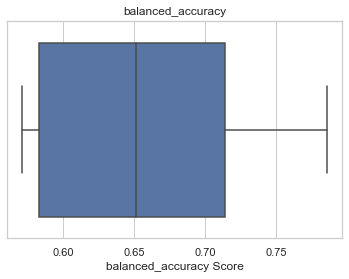

balanced_accuracy all:  [0.7142857142857143, 0.7857142857142857, 0.5714285714285714, 0.5833333333333334, 0.6515151515151515]
balanced_accuracy mean:  0.6612554112554112


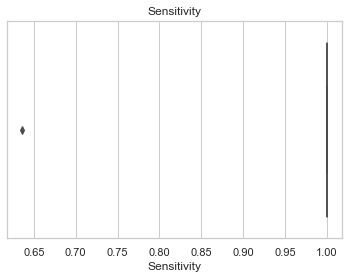

Sensitivity all:  [1.0, 1.0, 1.0, 1.0, 0.6363636363636364]
Sensitivity mean:  0.9272727272727274


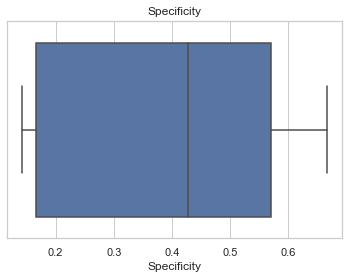

Specificity all:  [0.42857142857142855, 0.5714285714285714, 0.14285714285714285, 0.16666666666666666, 0.6666666666666666]
Specificity mean:  0.3952380952380953
One Combined Confusion Matrix
conf_matrix: 
  [[51  4]
 [20 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        55
         1.0       0.76      0.39      0.52        33

    accuracy                           0.73        88
   macro avg       0.74      0.66      0.66        88
weighted avg       0.74      0.73      0.70        88

matthews_corrcoef
0.3938914963649111
balanced_accuracy_score
0.6606060606060606
Sensitivity
0.9272727272727272
Specificity
0.3939393939393939
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6765840220385675


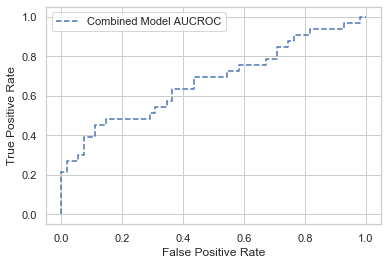

Start
0.0    67
1.0    39
Name: BSK_LPS_SRB_down, dtype: int64


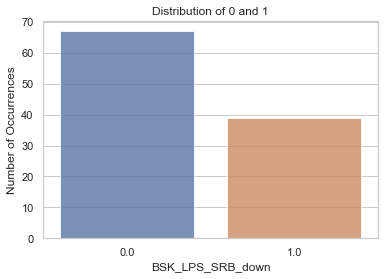

Total Compounds in Assay:  106
106
106
Total Selected CP features:  92
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[10  4]
 [ 2  6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        14
         1.0       0.60      0.75      0.67         8

    accuracy                           0.73        22
   macro avg       0.72      0.73      0.72        22
weighted avg       0.75      0.73      0.73        22

Total Selected CP features:  163
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 4]
 [6 2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.60      0.69      0.64        13
         1.0       0.33      0.25      0.29         8

    accuracy                           0.52        21
   macro avg       0.47      0.47      0.46        21
weighted avg       0.50      0.52      0.51        21

Total Selected CP features:  156
Total Selected train:  85
Tota

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  1]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.92      0.80        13
         1.0       0.75      0.38      0.50         8

    accuracy                           0.71        21
   macro avg       0.73      0.65      0.65        21
weighted avg       0.72      0.71      0.69        21

Total Selected CP features:  75
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  0]
 [ 5  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      1.00      0.84        13
         1.0       1.00      0.38      0.55         8

    accuracy                           0.76        21
   macro avg       0.86      0.69      0.69        21
weighted avg       0.83      0.76      0.73        21

Total Selected CP features:  87
Total Selected train:  8

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.93      0.87        14
         1.0       0.80      0.57      0.67         7

    accuracy                           0.81        21
   macro avg       0.81      0.75      0.77        21
weighted avg       0.81      0.81      0.80        21



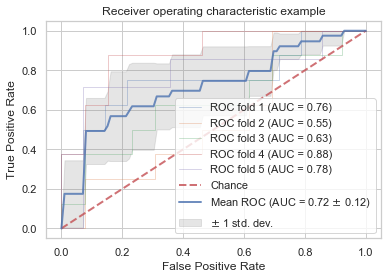

Mean of Each fold


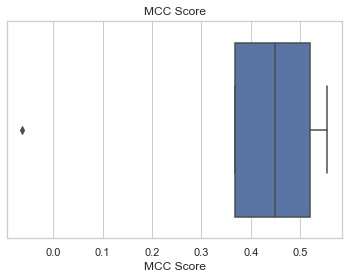

Matthews_corrcoef all:  [0.4485426135725303, -0.062017367294604234, 0.3686299079697329, 0.5204164998665333, 0.5533985905294664]
Matthews_corrcoef mean:  0.36579404892873174


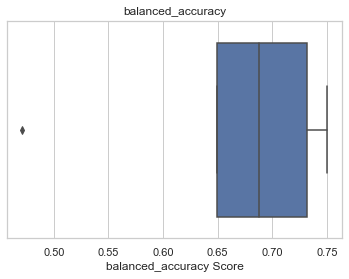

balanced_accuracy all:  [0.7321428571428572, 0.47115384615384615, 0.6490384615384616, 0.6875, 0.75]
balanced_accuracy mean:  0.6579670329670331


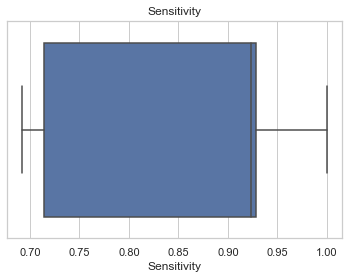

Sensitivity all:  [0.7142857142857143, 0.6923076923076923, 0.9230769230769231, 1.0, 0.9285714285714286]
Sensitivity mean:  0.8516483516483516


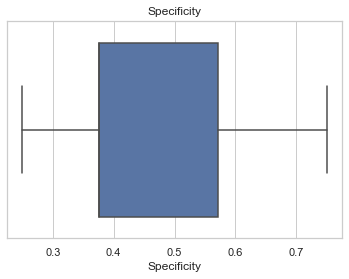

Specificity all:  [0.75, 0.25, 0.375, 0.375, 0.5714285714285714]
Specificity mean:  0.46428571428571425
One Combined Confusion Matrix
conf_matrix: 
  [[57 10]
 [21 18]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.85      0.79        67
         1.0       0.64      0.46      0.54        39

    accuracy                           0.71       106
   macro avg       0.69      0.66      0.66       106
weighted avg       0.70      0.71      0.69       106

matthews_corrcoef
0.34158133918836203
balanced_accuracy_score
0.656142365097589
Sensitivity
0.8507462686567164
Specificity
0.46153846153846156
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.705702257941064


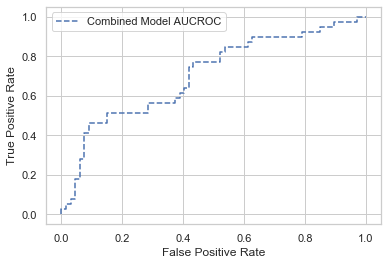

Start
0.0    70
1.0    36
Name: BSK_CASM3C_Proliferation_down, dtype: int64


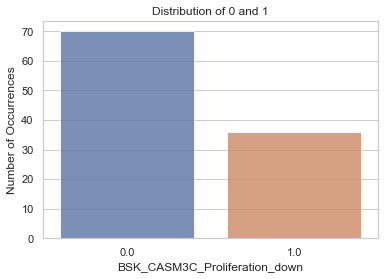

Total Compounds in Assay:  106
106
106
Total Selected CP features:  97
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.0s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   33.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 4  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.86      0.80        14
         1.0       0.67      0.50      0.57         8

    accuracy                           0.73        22
   macro avg       0.71      0.68      0.69        22
weighted avg       0.72      0.73      0.72        22

Total Selected CP features:  112
Total Selected t

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        14
         1.0       0.75      0.43      0.55         7

    accuracy                           0.76        21
   macro avg       0.76      0.68      0.69        21
weighted avg       0.76      0.76      0.74        21

Total Selected CP features:  180
Total Selected train:  85

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.7s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  4.0min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.70      1.00      0.82        14
         1.0       1.00      0.14      0.25         7

    accuracy                           0.71        21
   macro avg       0.85      0.57      0.54        21
weighted avg       0.80      0.71      0.63        21

Total Selected CP features:  184
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.1min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.79      0.76        14
         1.0       0.50      0.43      0.46         7

    accuracy                           0.67        21
   macro avg       0.62      0.61      0.61        21
weighted avg       0.66      0.67      0.66        21

Total Selected CP features:  250
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.69      0.79      0.73        14
         1.0       0.40      0.29      0.33         7

    accuracy                           0.62        21
   macro avg       0.54      0.54      0.53        21
weighted avg       0.59      0.62      0.60        21



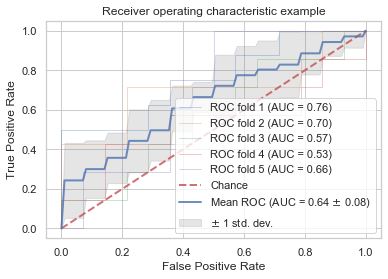

Mean of Each fold


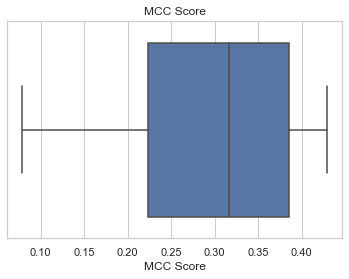

Matthews_corrcoef all:  [0.38575837490522974, 0.4287464628562721, 0.31622776601683794, 0.22360679774997896, 0.07905694150420949]
Matthews_corrcoef mean:  0.28667926860650567


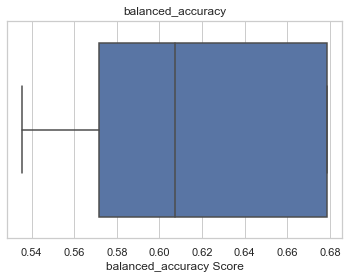

balanced_accuracy all:  [0.6785714285714286, 0.6785714285714286, 0.5714285714285714, 0.6071428571428571, 0.5357142857142857]
balanced_accuracy mean:  0.6142857142857142


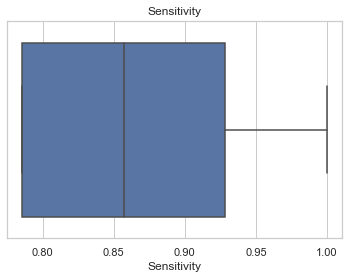

Sensitivity all:  [0.8571428571428571, 0.9285714285714286, 1.0, 0.7857142857142857, 0.7857142857142857]
Sensitivity mean:  0.8714285714285713


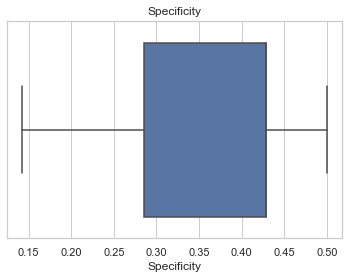

Specificity all:  [0.5, 0.42857142857142855, 0.14285714285714285, 0.42857142857142855, 0.2857142857142857]
Specificity mean:  0.3571428571428571
One Combined Confusion Matrix
conf_matrix: 
  [[61  9]
 [23 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.73      0.87      0.79        70
         1.0       0.59      0.36      0.45        36

    accuracy                           0.70       106
   macro avg       0.66      0.62      0.62       106
weighted avg       0.68      0.70      0.68       106

matthews_corrcoef
0.2715478459991979
balanced_accuracy_score
0.6162698412698413
Sensitivity
0.8714285714285714
Specificity
0.3611111111111111
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.653968253968254


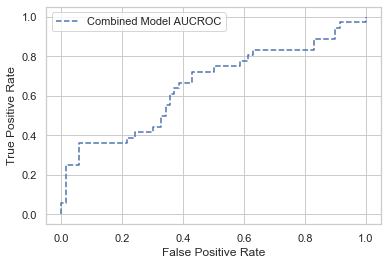

Start
0.0    70
1.0    36
Name: BSK_SAg_SRB_down, dtype: int64


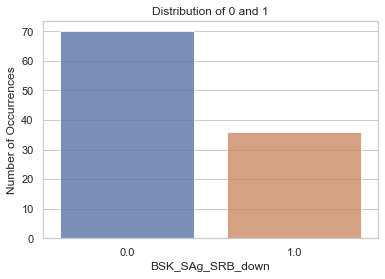

Total Compounds in Assay:  106
106
106
Total Selected CP features:  38
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   38.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.6min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.7min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[9 5]
 [2 6]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      0.64      0.72        14
         1.0       0.55      0.75      0.63         8

    accuracy                           0.68        22
   macro avg       0.68      0.70      0.68        22
weighted avg       0.72      0.68      0.69        22

Total Selected CP features:  114
Total Selected train:

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.7s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   40.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        14
         1.0       0.50      0.29      0.36         7

    accuracy                           0.67        21
   macro avg       0.60      0.57      0.57        21
weighted avg       0.64      0.67      0.64        21

Total Selected CP features:  173
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.0s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.8min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 7  0]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.93      0.76        14
         1.0       0.00      0.00      0.00         7

    accuracy                           0.62        21
   macro avg       0.33      0.46      0.38        21
weighted avg       0.43      0.62      0.51        21

Total Selected CP features:  93
Total Selected train:  85
T

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   12.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   35.4s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.6min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.7min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.9min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.72      0.93      0.81        14
         1.0       0.67      0.29      0.40         7

    accuracy                           0.71        21
   macro avg       0.69      0.61      0.61        21
weighted avg       0.70      0.71      0.68        21

Total Selected CP features:  98
Total Selected tra

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    9.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   37.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.9min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.5min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[12  2]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.86      0.77        14
         1.0       0.50      0.29      0.36         7

    accuracy                           0.67        21
   macro avg       0.60      0.57      0.57        21
weighted avg       0.64      0.67      0.64        21



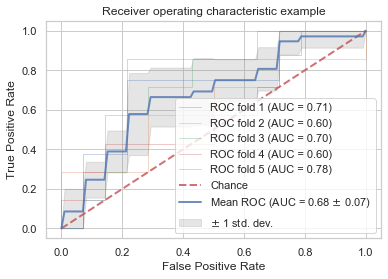

Mean of Each fold


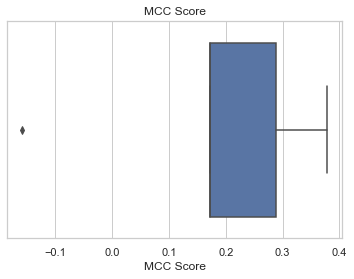

Matthews_corrcoef all:  [0.37796447300922725, 0.17149858514250885, -0.15811388300841897, 0.28867513459481287, 0.17149858514250885]
Matthews_corrcoef mean:  0.17030457897612777


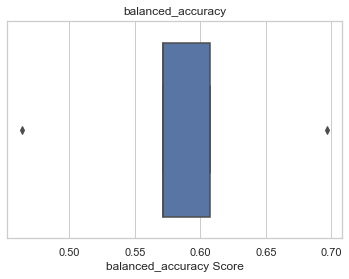

balanced_accuracy all:  [0.6964285714285714, 0.5714285714285714, 0.4642857142857143, 0.6071428571428572, 0.5714285714285714]
balanced_accuracy mean:  0.5821428571428571


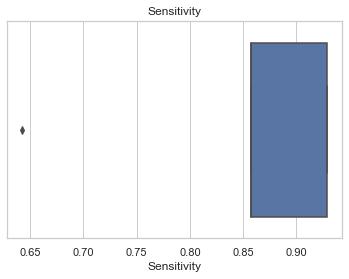

Sensitivity all:  [0.6428571428571429, 0.8571428571428571, 0.9285714285714286, 0.9285714285714286, 0.8571428571428571]
Sensitivity mean:  0.8428571428571429


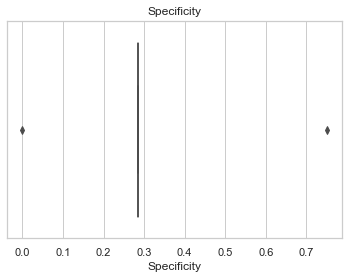

Specificity all:  [0.75, 0.2857142857142857, 0.0, 0.2857142857142857, 0.2857142857142857]
Specificity mean:  0.32142857142857134
One Combined Confusion Matrix
conf_matrix: 
  [[59 11]
 [24 12]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.71      0.84      0.77        70
         1.0       0.52      0.33      0.41        36

    accuracy                           0.67       106
   macro avg       0.62      0.59      0.59       106
weighted avg       0.65      0.67      0.65       106

matthews_corrcoef
0.20243226551313714
balanced_accuracy_score
0.5880952380952381
Sensitivity
0.8428571428571429
Specificity
0.3333333333333333
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6615079365079365


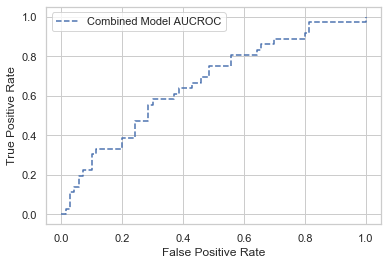

Start
0.0    72
1.0    34
Name: BSK_4H_SRB_down, dtype: int64


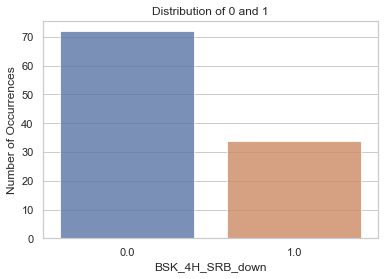

Total Compounds in Assay:  106
106
106
Total Selected CP features:  182
Total Selected train:  84
Total Selected test:  22
Fitting 5 folds for each of 768 candidates, totalling 3840 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   13.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   39.8s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  2.0min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.9min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  5.0min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  6.6min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  7.8min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[13  2]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.87      0.84        15
         1.0       0.67      0.57      0.62         7

    accuracy                           0.77        22
   macro avg       0.74      0.72      0.73        22
weighted avg       0.77      0.77      0.77        22

Total Selected CP features:  256
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   31.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.0min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.4min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        14
         1.0       1.00      0.43      0.60         7

    accuracy                           0.81        21
   macro avg       0.89      0.71      0.74        21
weighted avg       0.85      0.81      0.78        21

Total Selected CP features:  421
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   34.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  3.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  5.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  6.2min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[11  3]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.65      0.79      0.71        14
         1.0       0.25      0.14      0.18         7

    accuracy                           0.57        21
   macro avg       0.45      0.46      0.45        21
weighted avg       0.51      0.57      0.53        21

Total Selected CP features:  114
Total Selected tr

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    7.9s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   24.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.0s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.2min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[14  0]
 [ 3  4]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        14
         1.0       1.00      0.57      0.73         7

    accuracy                           0.86        21
   macro avg       0.91      0.79      0.82        21
weighted avg       0.88      0.86      0.84        21

Total Selected CP features:  258
Total Selected train:  85


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    8.3s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   25.1s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   48.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.7min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.4min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.2min
[Parallel(n_jobs=40)]: Done 3201 tasks      | elapsed:  4.3min
[Parallel(n_jobs=40)]: Done 3840 out of 3840 | elapsed:  5.3min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  0]
 [ 5  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        15
         1.0       1.00      0.17      0.29         6

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21



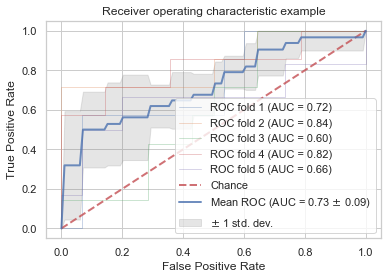

Mean of Each fold


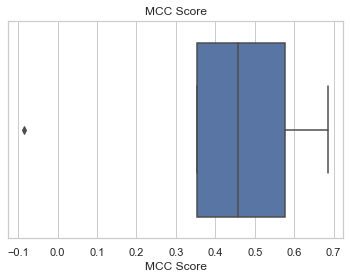

Matthews_corrcoef all:  [0.4581709669115176, 0.5773502691896257, -0.08574929257125442, 0.6859943405700354, 0.35355339059327373]
Matthews_corrcoef mean:  0.3978639349386396


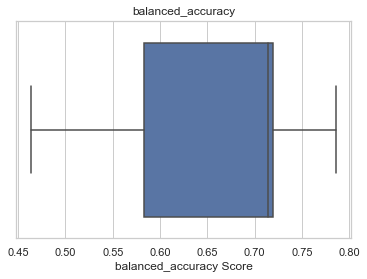

balanced_accuracy all:  [0.719047619047619, 0.7142857142857143, 0.4642857142857143, 0.7857142857142857, 0.5833333333333334]
balanced_accuracy mean:  0.6533333333333333


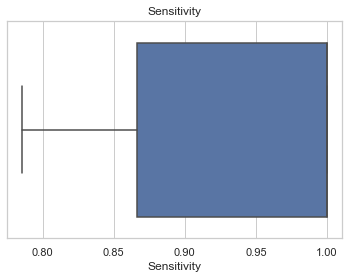

Sensitivity all:  [0.8666666666666667, 1.0, 0.7857142857142857, 1.0, 1.0]
Sensitivity mean:  0.9304761904761903


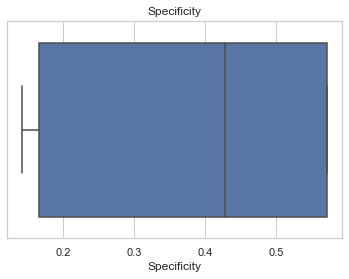

Specificity all:  [0.5714285714285714, 0.42857142857142855, 0.14285714285714285, 0.5714285714285714, 0.16666666666666666]
Specificity mean:  0.3761904761904762
One Combined Confusion Matrix
conf_matrix: 
  [[67  5]
 [21 13]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        72
         1.0       0.72      0.38      0.50        34

    accuracy                           0.75       106
   macro avg       0.74      0.66      0.67       106
weighted avg       0.75      0.75      0.73       106

matthews_corrcoef
0.38899630338984864
balanced_accuracy_score
0.6564542483660131
Sensitivity
0.9305555555555556
Specificity
0.38235294117647056
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.7165032679738562


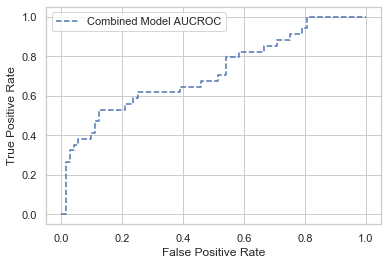

Start
0.0    90
1.0    34
Name: ACEA_T47D_80hr_Negative, dtype: int64


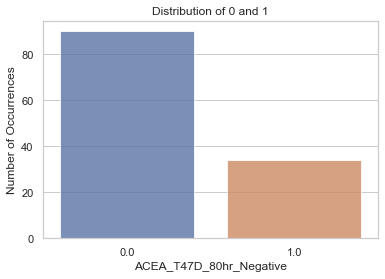

Total Compounds in Assay:  124
124
124
Total Selected CP features:  305
Total Selected train:  99
Total Selected test:  25
Fitting 4 folds for each of 768 candidates, totalling 3072 fits


[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    6.1s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   18.2s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   41.3s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  2.3min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  3.0min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  3.6min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 6  1]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.74      0.94      0.83        18
         1.0       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25

Total Selected CP features:  176
Total Selected train

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.6s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   11.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   28.4s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   49.9s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:  1.3min
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.8min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  2.5min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  3.1min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[18  0]
 [ 4  3]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        18
         1.0       1.00      0.43      0.60         7

    accuracy                           0.84        25
   macro avg       0.91      0.71      0.75        25
weighted avg       0.87      0.84      0.82        25

Total Selected CP features:  194
Total Selected train:  

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.8s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   11.3s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   21.9s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   35.5s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   52.1s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[15  3]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.75      0.83      0.79        18
         1.0       0.40      0.29      0.33         7

    accuracy                           0.68        25
   macro avg       0.57      0.56      0.56        25
weighted avg       0.65      0.68      0.66        25

Total Selected CP features:  127
Total Selected trai

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.5s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.6s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   20.7s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   33.7s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   49.8s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.5min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  1.9min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 5  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.77      0.94      0.85        18
         1.0       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

Total Selected CP features:  266
Total Selected train: 

[Parallel(n_jobs=40)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done  82 tasks      | elapsed:    3.4s
[Parallel(n_jobs=40)]: Done 285 tasks      | elapsed:   10.9s
[Parallel(n_jobs=40)]: Done 568 tasks      | elapsed:   21.0s
[Parallel(n_jobs=40)]: Done 933 tasks      | elapsed:   34.4s
[Parallel(n_jobs=40)]: Done 1378 tasks      | elapsed:   51.5s
[Parallel(n_jobs=40)]: Done 1905 tasks      | elapsed:  1.2min
[Parallel(n_jobs=40)]: Done 2512 tasks      | elapsed:  1.6min
[Parallel(n_jobs=40)]: Done 3072 out of 3072 | elapsed:  2.0min finished


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
In this fold
conf_matrix: 
  [[17  1]
 [ 4  2]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.81      0.94      0.87        18
         1.0       0.67      0.33      0.44         6

    accuracy                           0.79        24
   macro avg       0.74      0.64      0.66        24
weighted avg       0.77      0.79      0.76        24



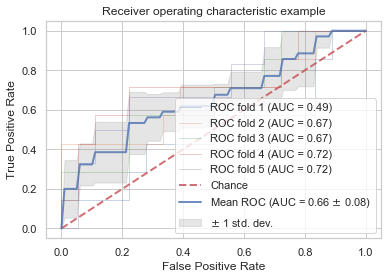

Mean of Each fold


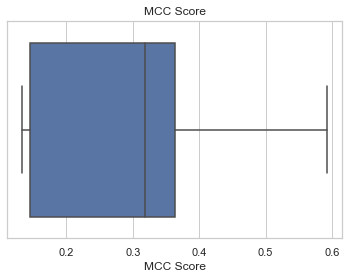

Matthews_corrcoef all:  [0.1444869078105018, 0.5921565254637922, 0.1336306209562122, 0.3180099858972217, 0.363696483726654]
Matthews_corrcoef mean:  0.3103961047708763


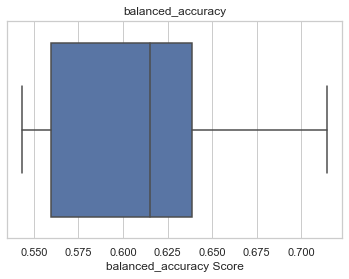

balanced_accuracy all:  [0.5436507936507936, 0.7142857142857143, 0.5595238095238095, 0.6150793650793651, 0.6388888888888888]
balanced_accuracy mean:  0.6142857142857143


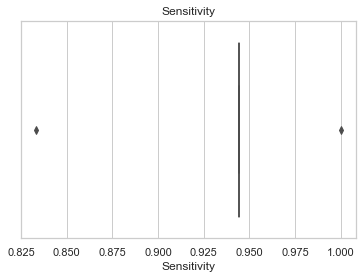

Sensitivity all:  [0.9444444444444444, 1.0, 0.8333333333333334, 0.9444444444444444, 0.9444444444444444]
Sensitivity mean:  0.9333333333333333


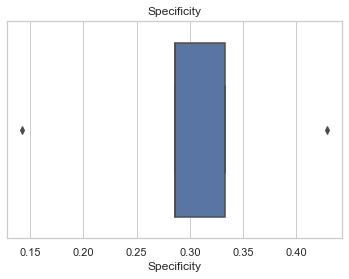

Specificity all:  [0.14285714285714285, 0.42857142857142855, 0.2857142857142857, 0.2857142857142857, 0.3333333333333333]
Specificity mean:  0.2952380952380952
One Combined Confusion Matrix
conf_matrix: 
  [[84  6]
 [24 10]]
classification_report: 
               precision    recall  f1-score   support

         0.0       0.78      0.93      0.85        90
         1.0       0.62      0.29      0.40        34

    accuracy                           0.76       124
   macro avg       0.70      0.61      0.62       124
weighted avg       0.74      0.76      0.73       124

matthews_corrcoef
0.3026750740244889
balanced_accuracy_score
0.6137254901960785
Sensitivity
0.9333333333333333
Specificity
0.29411764705882354
AUC-ROC for the combined results: 
Combined Model AUC ROC:  0.6477124183006536


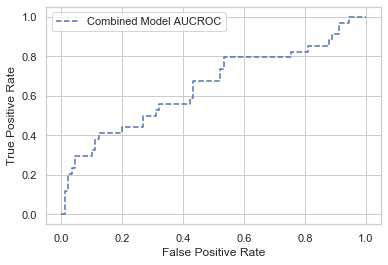

In [24]:
list_of_lists = []

for col in tox_list:
    
    method = "Morgan+CP_KS_0.02"
    
    print("Start")
    toxcast_counts=our_data[col].value_counts()
    print(our_data[col].value_counts())
    pyplot.figure()
    sns.barplot(toxcast_counts.index, toxcast_counts.values, alpha=0.8)
    pyplot.title('Distribution of 0 and 1')
    pyplot.ylabel('Number of Occurrences', fontsize=12)
    pyplot.xlabel(col, fontsize=12)
    pyplot.show()
    
    if col=='ACEA_T47D_80hr_Negative':
        n_cluster=4
    else:
        n_cluster=5  
        
    
    target=col

    df_temp=pd.merge(cp, toxcast[[target, 'smiles_r']], left_on = 'smiles_r', right_on = 'smiles_r', how = 'inner')
    df_temp['MorganFingerprint'] =df_temp['smiles_r'].apply(MorganFingerprint)
    df_temp=df_temp.dropna(subset=[target])
    df_temp=df_temp.drop('Unnamed: 0', axis = 1)
    
    
    X_erg = np.array([x for x in df_temp['MorganFingerprint']])
    
    
    data=df_temp 
    data=data.drop('MorganFingerprint', axis = 1)
    data=data.drop('smiles_r', axis = 1)
    

    
    X_CP, y = data.loc[:, data.columns != target], data[target]

    X_CP=X_CP.to_numpy()
    
    y=y.to_numpy()
        
    print("Total Compounds in Assay: ", len(y))
    X= np.concatenate((X_CP, X_erg ), axis=1)
    
    print(len(X))
    print(len(y))
    
    outercv = StratifiedKFold(n_splits=5,shuffle=True, random_state=0)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots()
    
    mat_cof=[]
    ba=[]
    sen=[]
    spe=[]
    combined_y_test=[]
    combined_y_pred=[]
    
    for i, (train_index, test_index) in enumerate(outercv.split(X, y)):
        
        
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_erg=X_train[:, 1766:]
        X_test_erg=X_test[:, 1766:]
        
        rows_train_CP= np.concatenate((X_train[:, :1766], y_train[:,None]),axis=1)
        new_df_train_CP = pd.DataFrame(rows_train_CP, columns=data.columns)
        
        rows_test_CP= np.concatenate((X_test[:, :1766], y_test[:,None]),axis=1)
        new_df_test_CP = pd.DataFrame(rows_test_CP, columns=data.columns)
        
        arr=[]
        col_list=[]

        for num in new_df_train_CP.columns:
        
            inactives=new_df_train_CP[num][new_df_train_CP[target]==0]
            actives=new_df_train_CP[num][new_df_train_CP[target]==1]
       
            if (ks_2samp(inactives, actives)[1] <= 0.02):
                col_list.append(num)
        
        print("Total Selected CP features: ",  len(col_list))
        

        train_data_CP=new_df_train_CP[col_list]
        test_data_CP=new_df_test_CP[col_list]
    
        X_train_CP= train_data_CP.loc[:, train_data_CP.columns != target]
        X_train_CP=X_train_CP.to_numpy()
        
        X_test_CP= test_data_CP.loc[:, test_data_CP.columns != target]
        X_test_CP=X_test_CP.to_numpy()
        
        X_train= np.concatenate((X_train_CP, X_train_erg ), axis=1)
        X_test= np.concatenate((X_test_CP, X_test_erg ), axis=1)
        
        print("Total Selected train: ",  len(X_train))
        print("Total Selected test: ",  len(X_test))
        
        inner_cv = StratifiedKFold(n_splits=n_cluster, shuffle=True, random_state=0)
               
        param_grid = { 
        'max_depth': [15, 10, 20],
        'max_features': ['auto'],
        'min_samples_leaf': [3, 6, 12, 15],
        'min_samples_split': [6, 9, 12, 15],
        'n_estimators':[100, 200, 300, 700],
        'bootstrap': [False],
        'oob_score': [False],
        'random_state': [0],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [-1],
        'class_weight' : [None, 'balanced']
        }

        # Create a based model
        rf = RandomForestClassifier()
        # Instantiate the grid search model
        grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                                  cv = inner_cv, n_jobs =40, verbose = 2)

        # Fit the grid search to the data
        grid_search.fit(X_train, y_train)
        print(grid_search.best_estimator_)

        classifier = grid_search.best_estimator_
        
        
        
        classifier.fit(X_train, y_train)
       
        y_pred = classifier.predict(X_test)
        y_proba = classifier.predict_proba(X_test)
       
        combined_y_test=np.concatenate((combined_y_test, y_test), axis=None)
        combined_y_pred=np.concatenate((combined_y_pred, y_pred), axis=None)
        
        if i==0:
            combined_y_proba=y_proba
        else:
            combined_y_proba=np.concatenate((combined_y_proba, y_proba), axis=0)
    
    
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("In this fold")
        print("conf_matrix: \n " , conf_matrix)
        print("classification_report: \n",classification_report(y_test, y_pred))
    
        mat_cof.append(matthews_corrcoef(y_test, y_pred))
        ba.append(balanced_accuracy_score(y_test, y_pred))
        
        sen.append(conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1]))
        spe.append(conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1]))

        
        viz = plot_roc_curve(classifier, X_test, y_test,
                             name='ROC fold {}'.format(1+i),
                             alpha=0.3, lw=1, ax=ax)
        
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title="Receiver operating characteristic example")
    ax.legend(loc="lower right")
    plt.show()
    
    print("Mean of Each fold")
       
    sns.set(style="whitegrid")    
    sns.boxplot(x=mat_cof).set(title = 'MCC Score', xlabel = 'MCC Score' )
    plt.show()
    print("Matthews_corrcoef all: ",(mat_cof))
    print("Matthews_corrcoef mean: ", np.mean(mat_cof))
    
    sns.boxplot(x=ba).set(title = 'balanced_accuracy', xlabel = 'balanced_accuracy Score' )
    plt.show() 
    print("balanced_accuracy all: ",(ba))
    print("balanced_accuracy mean: ", np.mean(ba))
        
    sns.boxplot(x=sen).set(title = 'Sensitivity', xlabel = 'Sensitivity' )
    plt.show()
    print("Sensitivity all: ",(sen))
    print("Sensitivity mean: ", np.mean(sen))
        
    sns.boxplot(x=spe).set(title = 'Specificity', xlabel = 'Specificity' )
    plt.show()
    print("Specificity all: ",(spe))
    print("Specificity mean: ", np.mean(spe))
    
    
    
    print("One Combined Confusion Matrix")
    combined_conf_matrix = confusion_matrix(combined_y_test, combined_y_pred)
    print("conf_matrix: \n " , combined_conf_matrix)
    print("classification_report: \n",classification_report(combined_y_test, combined_y_pred))
    
    print('matthews_corrcoef')
    mcc= matthews_corrcoef(combined_y_test, combined_y_pred)
    print(mcc)
    
    print('balanced_accuracy_score')
    ba= balanced_accuracy_score(combined_y_test, combined_y_pred)
    print(ba)
    
    print('Sensitivity')   
    sen=combined_conf_matrix[0,0]/(combined_conf_matrix[0,0]+combined_conf_matrix[0,1])
    print(sen)
    
    print('Specificity')  
    spe=combined_conf_matrix[1,1]/(combined_conf_matrix[1,0]+combined_conf_matrix[1,1])
    print(spe)
       
    print("AUC-ROC for the combined results: ")
    probs_combined_model= combined_y_proba[:,1]
    roc_value_combined_model= roc_auc_score(combined_y_test, probs_combined_model) 
    print("Combined Model AUC ROC: ", roc_value_combined_model)
    
    base_model_fpr, base_model_tpr, _ = roc_curve(combined_y_test, probs_combined_model)
    plt.plot(base_model_fpr, base_model_tpr, linestyle='--', label='Combined Model AUCROC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    row=[col, method, sen, spe, ba, mcc, roc_value_combined_model]
    list_of_lists.append(row)

In [25]:
df=pd.DataFrame(list_of_lists,columns=["target", "method", "sen", "spe", "ba", "mcc", "auc_roc"])
df

,target,method,sen,spe,ba,mcc,auc_roc
0,BSK_hDFCGF_Proliferation_down,Morgan+CP_KS_0.02,0.660000,0.607143,0.633571,0.266905,0.663571
1,APR_HepG2_CellLoss_72h_dn,Morgan+CP_KS_0.02,0.860465,0.488889,0.674677,0.374931,0.665633
2,BSK_3C_Proliferation_down,Morgan+CP_KS_0.02,0.730769,0.500000,0.615385,0.236880,0.684117
3,BSK_SAg_Proliferation_down,Morgan+CP_KS_0.02,0.741379,0.395833,0.568606,0.146327,0.594468
4,BSK_3C_SRB_down,Morgan+CP_KS_0.02,0.786885,0.333333,0.560109,0.134777,0.563570
5,BSK_3C_Vis_down,Morgan+CP_KS_0.02,0.892308,0.463415,0.677861,0.402650,0.704690
6,APR_HepG2_CellLoss_24h_dn,Morgan+CP_KS_0.02,0.927273,0.393939,0.660606,0.393891,0.676584
7,BSK_LPS_SRB_down,Morgan+CP_KS_0.02,0.850746,0.461538,0.656142,0.341581,0.705702
8,BSK_CASM3C_Proliferation_down,Morgan+CP_KS_0.02,0.871429,0.361111,0.616270,0.271548,0.653968
9,BSK_SAg_SRB_down,Morgan+CP_KS_0.02,0.842857,0.333333,0.588095,0.202432,0.661508


In [26]:
file_name="Metrics_KFold_Aggregated"+method+".csv"
df.to_csv(file_name)